# Facial Recognition via Eigenfaces

In lab 004 we described the Singular Value Decomposition and how it can be used for dimensionality reduction. Using eigenvectors to find the dimensions with the most variance is often called Principle Component Analysis, or PCA. Here we'll use a similar approach to classify faces by identifying the "eigenfaces" that most readily distinguish one person from another.

Our dataset consists of several photos for each of $153$ individuals, we'll take one photo of each person to train our model, and when we test our model we'll pick from the other pictures of that person to see if we can match them correctly. Often images are stored in a matrix with one entry for each pixel representing the brightness of that pixel. We take each $200\times180$ pixel photo and flatten the matrix by listing row one, then row two, then row three to make one long vector of length $200\times180=36000$ representing the entire image. We then line up those vectors into the columns of a matrix that has dimensions $36000\times153$.

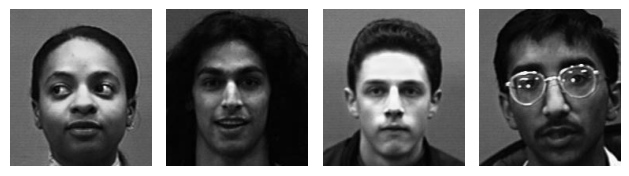

In [1]:
import matplotlib.pyplot as plt
from modules.facial_recognition import sample_faces, show, FacialRec

for i,face in enumerate(sample_faces(4)):
    plt.subplot(1,4,i+1)
    show(face)
plt.tight_layout()
plt.show()

As a preprocessing step, and before we start SVD, we'll first average all the faces into one "mean" face (not angry, just average) and subtract that "mean" face from each of the other faces to accentuate the differences in this face versus the rest of them. You take the average value in pixel one for all 153 photos, the average value in pixel two, and so on. The result is a generic face that you can subtract from all the other faces to make them stand out from the rest. That will help boost the performance of the model when we do the SVD.

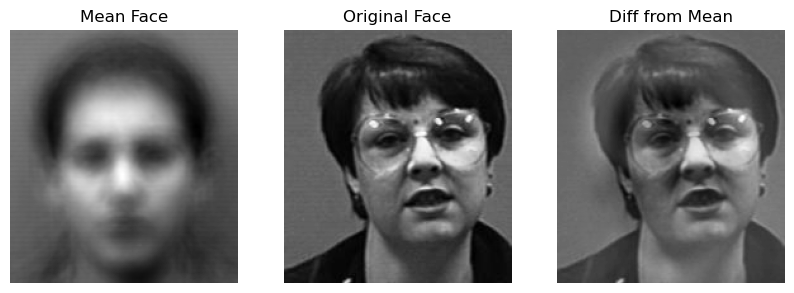

In [2]:
FR = FacialRec()

#plot mean, original, and shifted
plt.figure(figsize=(10,4))

plt.subplot(131)
plt.title('Mean Face')
show(FR.mu)

plt.subplot(132)
plt.title('Original Face')
show(FR.F.T[-13])

plt.subplot(133)
plt.title('Diff from Mean')
show(FR.Fbar.T[-13])
plt.show()

Now, we have all 153 photos in the columns of our matrix and we can do SVD to find the dimensions where they differ the most. As a reminder, the SVD takes our matrix $A$, multiplies it by its transpose (where we swap the rows for the columns), and finds the eigenvectors of $A^TA$. These eigenvectors will represent the dimensions that make up faces in general, like nose size or hairstyle. It also sorts these dimensions in order from greatest to least variance, meaning which dimensions are the most integral to identifying one face versus another? 

We have our matrix of faces, and we have a list of eigenvectors or "eigenfaces" that represent the most differentiable features for the faces we've collected. Those will be the dimensions we use to pick out one face from the rest. Kinda like the game Guess Who, you don't want to start by asking "does this person have horn-rimmed glasses?" You probably want to start by asking "is it a guy or a girl?" or "are they dark skinned or light skinned?" Our "eigenfaces" represent the questions that are most helpful to ask first. Below you can see several "eigenfaces", they seem to first look at skin tone and maybe hair color, then the higher you go the more specific the dimensions get, like the glasses in the 50th "eigenface".

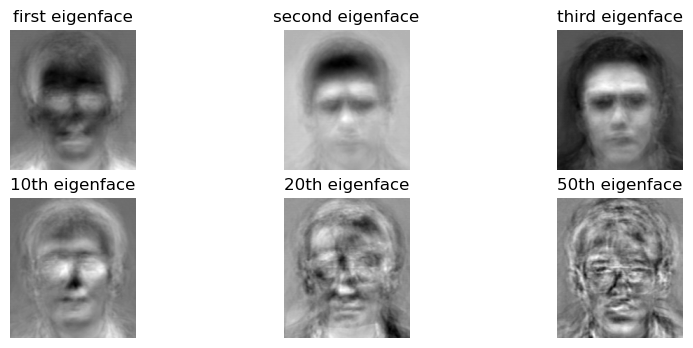

In [3]:
plt.figure(figsize=(10,4))
titles = ['first','second','third','10th','20th','50th']
#show the first, 50th, and 100th eigenfaces
for i,s in enumerate([0,1,2,9,19,49]):
    plt.subplot(2,3,i+1)
    plt.title(titles[i]+' eigenface')
    show(FR.U[:,s])

We got these "eigenfaces" by decomposing the matrix of all of the faces, and we can reconstruct each face using a combination of all our "eigenfaces". In this case we'll have 153 "eigenfaces", and each of our real faces is a combination of those. Luckily, we probably don't need all 153 to tell who's who because we sorted them from most to least important. So a specific face might be $1.5$ of skin tone, $-0.8$ of hair color, $0.5 of nose size and $1$ for glasses. Below we reconstruct a face using those dimensions. By 45 you can start to recognize our friend, and by 75 dimensions you can definitely tell who they are. That's great because 75 dimensions is a lot easier to compare than 36000 dimensions.

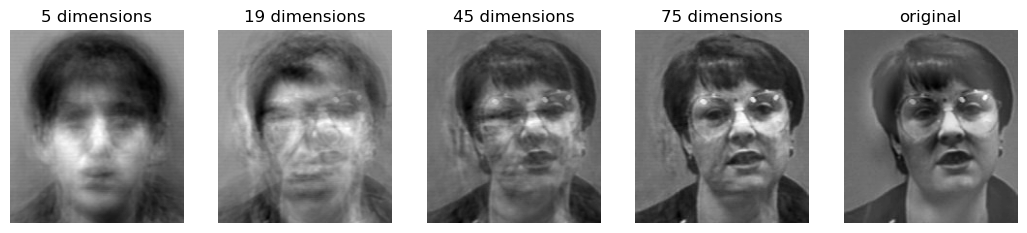

In [4]:
plt.figure(figsize=(13,8))
#show reconstruction for s = 5,19,45,75
for i,s in enumerate([5,19,45,75]):
    plt.subplot(1,5,i+1)
    plt.title(f'{s} dimensions')
    show(FR.U[:,:s]@FR.project(FR.Fbar[:,-13],s)+FR.mu)

#original
plt.subplot(155)
plt.title('original')
show(FR.Fbar[:,-13])

Once you have a representation of all your faces in 75 dimensions, you can perform a search to see which face in your database is the closest to the face you're trying to match. In a small dataset like our 153, it would be easy to check a new face against every face in the database, but if you have millions or billions of faces, you'd want a faster way to search. A KD-Tree like the one we built in lab 001 would significantly speed up the process.

The result is a model that can take in a new face and search the database for the closest face it can find that looks like the new one. It's obviously not perfect, but it does remarkably well identifying who's who in our database!

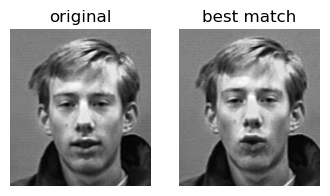

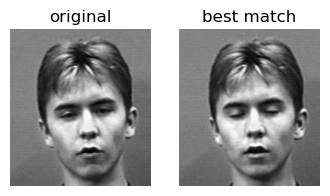

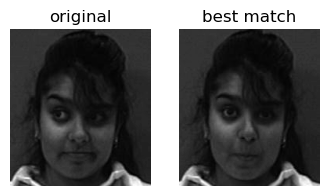

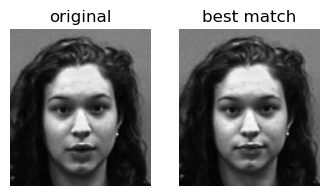

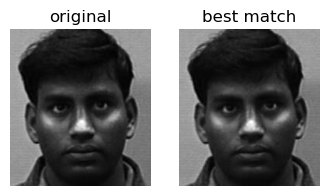

In [5]:
for test_image in sample_faces(5):
    plt.figure(figsize=(4,4))
    FR.match(test_image)